In [1]:
""" 
The goal in this exercise is to create a DNN model to predict diabetes based on different kind of information.
"""

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split


2025-01-07 17:13:18.743825: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-07 17:13:18.746661: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-07 17:13:18.755089: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736266398.770957   84821 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736266398.776021   84821 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-07 17:13:18.790859: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [3]:
# Load dataset

df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Check the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Observamos la media, la desviación estándar y los cuartiles del dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0, 0.5, 'Average')

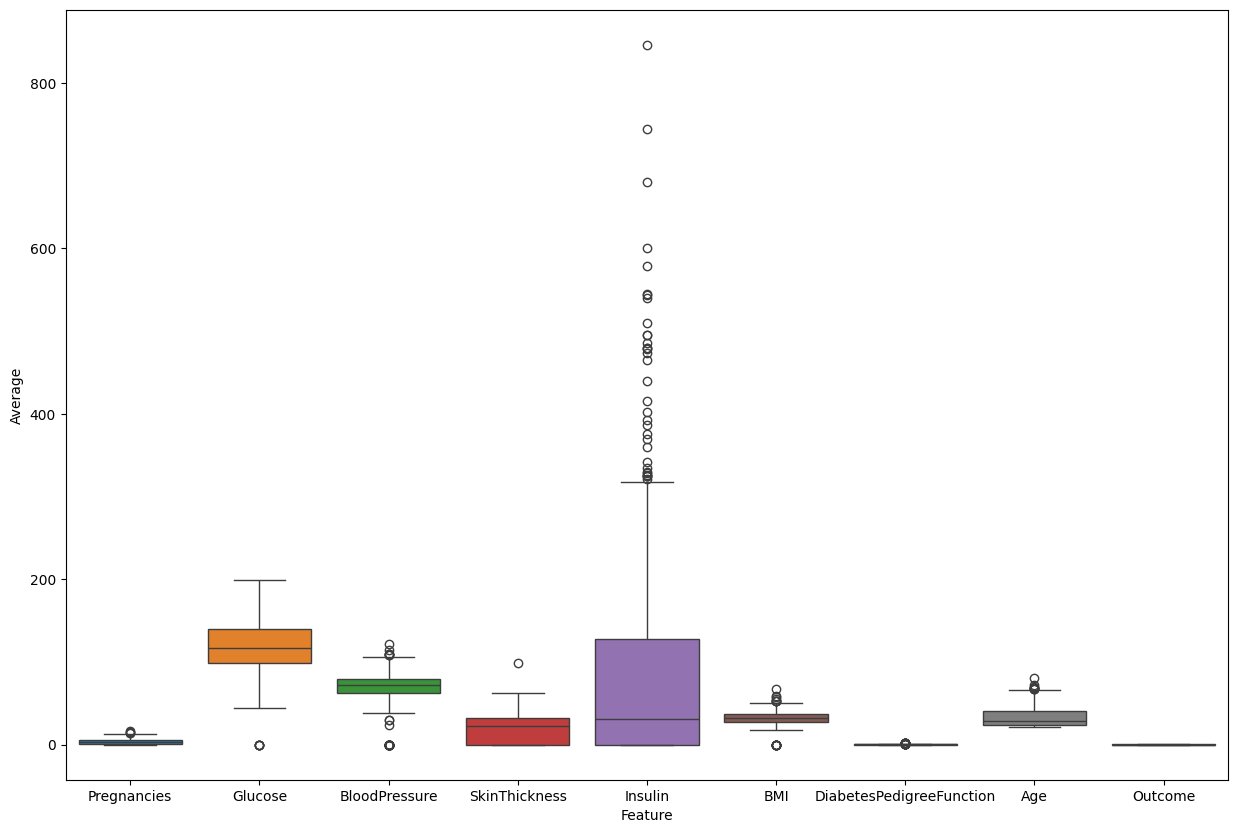

In [6]:
# Plot the features to look for outliers
plt.figure(figsize = (15,10))
box = sns.boxplot(data=df)
plt.xlabel('Feature')
plt.ylabel('Average')

In [7]:
# We can see that there are some features with many outliers like 'Insulin Feature', let's split the data in X and y to normalize it

X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Create the model

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Another way to create the model is: 
""" 
model = Sequential([
    Dense(32, activation='relu', input_shape=(n_features,)),  # Capa oculta 1
    Dropout(0.2),  # Regularización para evitar sobreajuste
    Dense(16, activation='relu'),  # Capa oculta 2
    Dense(1, activation='sigmoid')  # Capa de salida (clasificación binaria)
])
"""

# Now compile

model.compile(
    optimizer='adam',  
    loss='binary_crossentropy',  
    metrics=['accuracy'] 
)

# Fit the model 
history = model.fit(X_train, y_train, validation_split=0.2, epochs= 80, verbose=1)

Epoch 1/80


/home/aibg/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-01-07 17:13:20.454545: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4670 - loss: 10.8730 - val_accuracy: 0.5772 - val_loss: 3.2040
Epoch 2/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5880 - loss: 8.0935 - val_accuracy: 0.6179 - val_loss: 2.0020
Epoch 3/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5490 - loss: 7.5192 - val_accuracy: 0.6504 - val_loss: 1.5329
Epoch 4/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5502 - loss: 5.1214 - val_accuracy: 0.6260 - val_loss: 1.3529
Epoch 5/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5411 - loss: 5.1727 - val_accuracy: 0.6585 - val_loss: 1.4213
Epoch 6/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5734 - loss: 4.0346 - val_accuracy: 0.6423 - val_loss: 1.2695
Epoch 7/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5756 - loss: 3.0136 - val_accuracy: 0.6016 - val_loss: 0.9305
Epoch 8/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5065 - loss: 3.2971 - val_accuracy: 0.6016 - val_loss: 0.9239
Ep

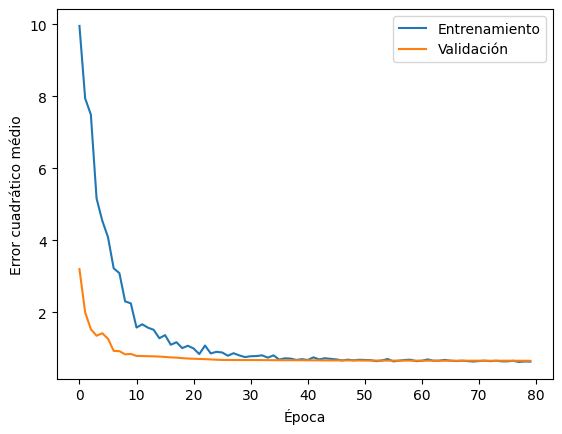

In [10]:
# Plot the loss curves to see if it's overfitting or not
def plot_history():
    plt.plot(history.history['loss'], label="Entrenamiento")
    plt.plot(history.history['val_loss'], label="Validación")
    plt.ylabel('Error cuadrático médio')
    plt.xlabel('Época')
    plt.legend(loc="upper right")

plot_history()

In [11]:
# Check the loss and the accuracy

loss, accuracy = model.evaluate(X_test, y_test)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6778 - loss: 0.6389
Loss: 0.644660472869873
Accuracy: 0.6558441519737244


In [12]:
# Predict with the model
predicts = model.predict(X_test)

y_pred = (predicts > 0.5).astype(int)

print(f'Resultado esperado para el target 0: {y_test.iloc[0]}')
print(f'Resultado predicho para el target 0: {y_pred[0, 0]}\n')

print(f'Resultado esperado para el target 1: {y_test.iloc[1]}')
print(f'Resultado predicho para el target 1: {y_pred[1, 0]}\n')

print(f'Resultado esperado para el target 2: {y_test.iloc[2]}')
print(f'Resultado predicho para el target 2: {y_pred[2, 0]}\n')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Resultado esperado para el target 0: 0
Resultado predicho para el target 0: 0

Resultado esperado para el target 1: 0
Resultado predicho para el target 1: 0

Resultado esperado para el target 2: 0
Resultado predicho para el target 2: 0



In [13]:
# Another way of printing the predictions
for i in range(len(y_test)):
    print(f'Resultado esperado para el target {i}: {y_test.iloc[i]}')
    print(f'Resultado predicho para el target {i}: {y_pred[i, 0]}\n')

Resultado esperado para el target 0: 0
Resultado predicho para el target 0: 0

Resultado esperado para el target 1: 0
Resultado predicho para el target 1: 0

Resultado esperado para el target 2: 0
Resultado predicho para el target 2: 0

Resultado esperado para el target 3: 0
Resultado predicho para el target 3: 0

Resultado esperado para el target 4: 0
Resultado predicho para el target 4: 0

Resultado esperado para el target 5: 0
Resultado predicho para el target 5: 0

Resultado esperado para el target 6: 0
Resultado predicho para el target 6: 0

Resultado esperado para el target 7: 0
Resultado predicho para el target 7: 0

Resultado esperado para el target 8: 0
Resultado predicho para el target 8: 0

Resultado esperado para el target 9: 0
Resultado predicho para el target 9: 0

Resultado esperado para el target 10: 1
Resultado predicho para el target 10: 0

Resultado esperado para el target 11: 0
Resultado predicho para el target 11: 0

Resultado esperado para el target 12: 1
Resultad

In [14]:
# Check different metrics to see how our model worked
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

# Precisión
precision = precision_score(y_test, y_pred)
print(f'Precisión: {precision}')

# Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')

# F1-Score
f1 = f1_score(y_test, y_pred)
print(f'F1-Score: {f1}')

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Precisión: 1.0
Recall: 0.03636363636363636
F1-Score: 0.07017543859649122
Accuracy: 0.6558441558441559
